# Análise de Academias (Google Places)

Este notebook carrega um JSON com resultados do crawler do Google Places, mostra estatísticas básicas e gera gráficos:
- Top categorias
- Histogramas de `totalScore` e `reviewsCount`
- Boxplots
- Dispersão entre número de avaliações e nota média

Ajuste a variável `FILEPATH` abaixo se o caminho do arquivo for diferente.

In [ ]:
import os
import json
from pathlib import Path
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Configurações iniciais
FILEPATH = r"C:\Users\rafae\OneDrive\Documentos\dataset_crawler-google-places_2025-11-10_23-10-33-209.json"
TOP_N_CATEGORIES = 10
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

: 

In [2]:
# Carregamento robusto do JSON
p = Path(FILEPATH)
if not p.exists():
    raise FileNotFoundError(f"Arquivo não encontrado em {FILEPATH}, ajuste o caminho.")

try:
    df = pd.read_json(str(p), orient='records')
except Exception as e:
    print('pd.read_json falhou, tentando fallback com json.load + json_normalize:', e)
    with p.open('r', encoding='utf-8') as f:
        data = json.load(f)
    df = pd.json_normalize(data)

print('Dados carregados. Linhas:', len(df))

Dados carregados. Linhas: 15


In [3]:
# Informações básicas do dataset
print("Shape do dataset:", df.shape)
print(df.dtypes)
df.head()

Shape do dataset: (15, 11)
title            object
totalScore      float64
reviewsCount      int64
street           object
city             object
state            object
countryCode      object
phone            object
categoryName     object
url              object
website          object
dtype: object


,title,totalScore,reviewsCount,street,city,state,countryCode,phone,categoryName,url,website
0,Prime Fit Academia,4.7,87,"Av. C-171, N° 711 - QD. 443 A LT. 15",Goiânia,Goiás,BR,+55 62 99297-8364,Academia,https://www.google.com/maps/search/?api=1&quer...,NaN
1,Athos Academia,4.4,430,"R. Tambuqui, Qd 199 - Lt 01/13/14",Goiânia,Goiás,BR,+55 62 98143-2218,Academia,https://www.google.com/maps/search/?api=1&quer...,http://www.athosacademia.com.br/
2,Flex Fitness Center Buena Vista,4.5,401,"Shopping Buena Vista - Av. T-4, 466",Goiânia,Goiás,BR,+55 62 3515-0588,Sala de fitness,https://www.google.com/maps/search/?api=1&quer...,https://www.flexfitnesscenter.com.br/unidades/...
3,Academia Power Fit - Jardim America - Goiânia,4.4,144,"Av. C-104, 1673 - Quadra 397 lote 06",Goiânia,Goiás,BR,+55 62 98166-5648,Academia,https://www.google.com/maps/search/?api=1&quer...,https://www.instagram.com/power_fit_2023/
4,21 Fitness,4.5,445,"Av. Transbrasiliana, Quadra 199, Lote 5, s/n",Goiânia,Goiás,BR,+55 62 3639-5520,Academia,https://www.google.com/maps/search/?api=1&quer...,http://www.academia21fitness.com.br/


In [4]:
# Estatísticas descritivas das colunas numéricas principais
num_cols = [c for c in ['totalScore', 'reviewsCount'] if c in df.columns]
if num_cols:
    df[num_cols].describe()
else:
    print("Colunas numéricas esperadas ('totalScore','reviewsCount') não encontradas no dataset.")

In [5]:
# Contagem das principais categorias
if 'categoryName' in df.columns:
    cat_counts = df['categoryName'].value_counts().head(TOP_N_CATEGORIES)
    print(f"Top {TOP_N_CATEGORIES} categorias:")
    print(cat_counts)
else:
    cat_counts = pd.Series(dtype=int)
    print("Coluna 'categoryName' não encontrada; 'cat_counts' definido vazio.")

Top 10 categorias:
categoryName
Academia           12
Sala de fitness     3
Name: count, dtype: int64


In [6]:
# Contagem das cidades
if 'city' in df.columns:
    city_counts = df['city'].value_counts()
    print("Contagem por cidade:")
    print(city_counts)
else:
    print("Coluna 'city' não encontrada no dataset.")

Contagem por cidade:
city
Goiânia    15
Name: count, dtype: int64


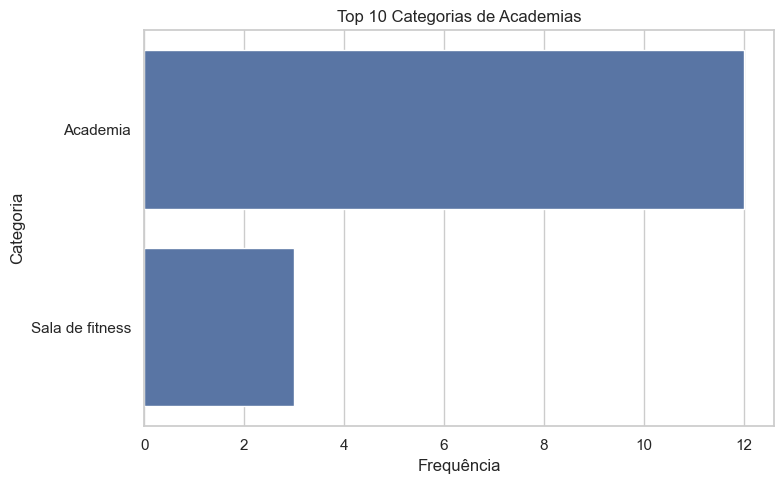

In [7]:
# Gráfico de barras das principais categorias
plt.figure(figsize=(8, 5))
if 'cat_counts' in globals() and not cat_counts.empty:
    sns.barplot(x=cat_counts.values, y=cat_counts.index)
    plt.title(f"Top {TOP_N_CATEGORIES} Categorias de Academias")
    plt.xlabel("Frequência")
    plt.ylabel("Categoria")
    plt.tight_layout()
    plt.show()
else:
    print('Nenhuma categoria disponível para plotagem (cat_counts vazio ou não definido).')

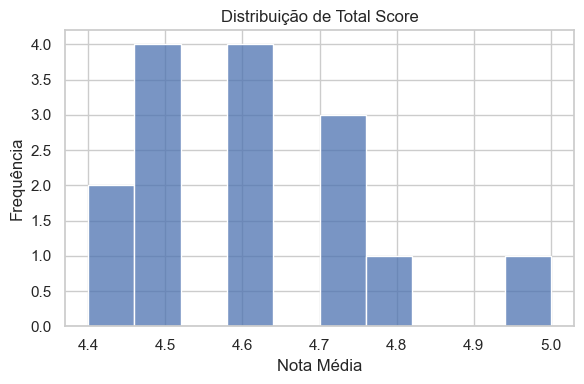

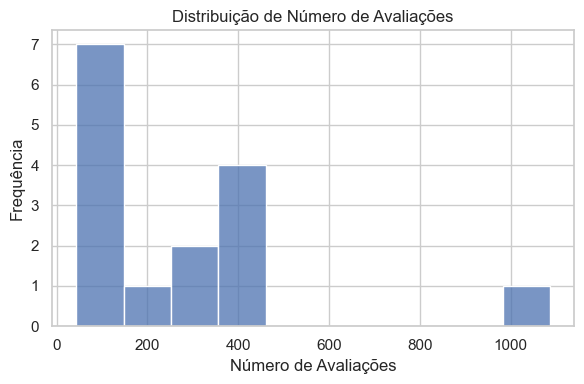

In [8]:
# Histogramas de totalScore e reviewsCount
plt.figure(figsize=(6, 4))
if 'totalScore' in df.columns and df['totalScore'].dropna().shape[0] > 0:
    sns.histplot(df['totalScore'].dropna(), bins=10, kde=False)
    plt.title("Distribuição de Total Score")
    plt.xlabel("Nota Média")
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()
else:
    print("Coluna 'totalScore' ausente ou sem dados para plotar histograma.")

plt.figure(figsize=(6, 4))
if 'reviewsCount' in df.columns and df['reviewsCount'].dropna().shape[0] > 0:
    sns.histplot(df['reviewsCount'].dropna(), bins=10, kde=False)
    plt.title("Distribuição de Número de Avaliações")
    plt.xlabel("Número de Avaliações")
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()
else:
    print("Coluna 'reviewsCount' ausente ou sem dados para plotar histograma.")

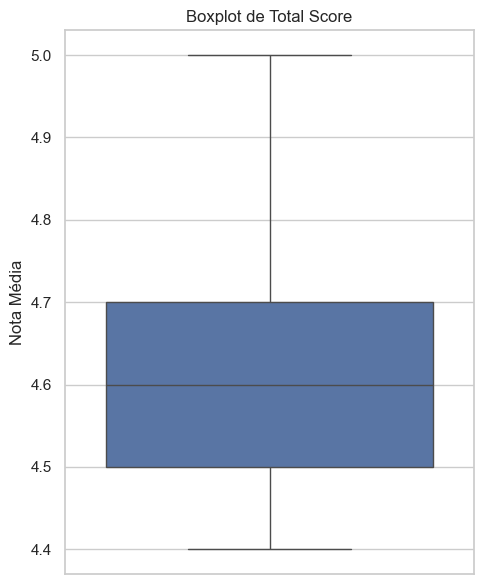

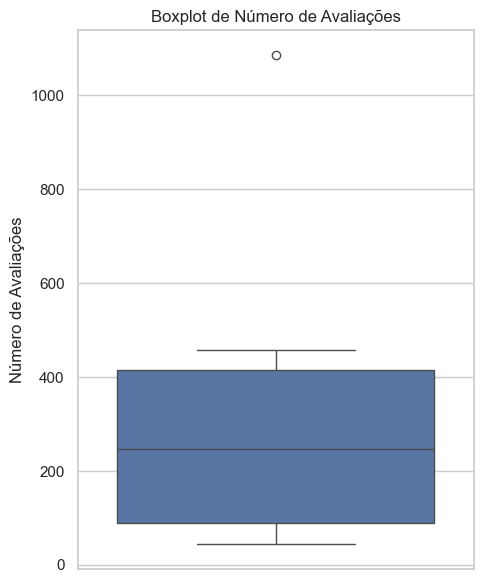

In [9]:
# Boxplots para verificar outliers
plt.figure(figsize=(5, 6))
if 'totalScore' in df.columns and df['totalScore'].dropna().shape[0] > 0:
    sns.boxplot(y=df['totalScore'].dropna())
    plt.title("Boxplot de Total Score")
    plt.ylabel("Nota Média")
    plt.tight_layout()
    plt.show()
else:
    print("Coluna 'totalScore' ausente ou sem dados para plotar boxplot.")

plt.figure(figsize=(5, 6))
if 'reviewsCount' in df.columns and df['reviewsCount'].dropna().shape[0] > 0:
    sns.boxplot(y=df['reviewsCount'].dropna())
    plt.title("Boxplot de Número de Avaliações")
    plt.ylabel("Número de Avaliações")
    plt.tight_layout()
    plt.show()
else:
    print("Coluna 'reviewsCount' ausente ou sem dados para plotar boxplot.")

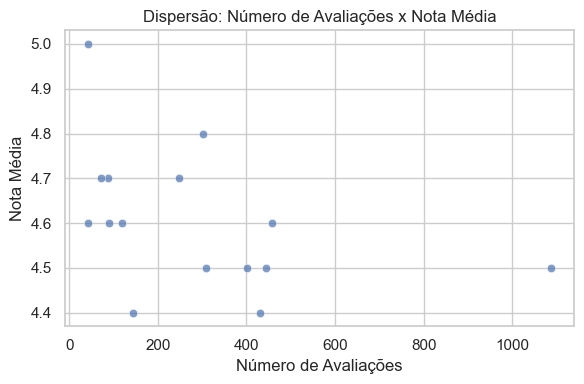

In [10]:
# Scatter plot de reviewsCount vs totalScore
if ('reviewsCount' in df.columns and 'totalScore' in df.columns and
        df['reviewsCount'].dropna().shape[0] > 0 and df['totalScore'].dropna().shape[0] > 0):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df['reviewsCount'], y=df['totalScore'], alpha=0.7)
    plt.title("Dispersão: Número de Avaliações x Nota Média")
    plt.xlabel("Número de Avaliações")
    plt.ylabel("Nota Média")
    plt.tight_layout()
    plt.show()
else:
    print("Colunas necessárias para scatter plot ('reviewsCount' e 'totalScore') ausentes ou sem dados suficientes.")